<h1 style="color:coral">Image Classification using CNN</h1>

The project involves building an image classification system using Convolutional Neural Networks
(CNNs). CNNs are widely used for image-related tasks and have achieved remarkable success in
various domains. This project will allow students to gain hands-on experience with deep
learning, image processing, and model development.

<h3 style="color: darkred">Objective:</h3>
To create a user friendly flask app that can classify input images effectively and accurately.

<h3 style="color: darkred">Methodologies that we are going to follow for our ML Model :</h3>
<ul>
    <li>Data Collection</li>
    <li>Data Processing</li>
    <li>Model Creation</li>
    <li>Model Traing and Optimization</li>
    <li>Model Evaluation</li>
    <li>Dumping our model</li>
</ul>

Here's how we are going to implement our Model

<h4 style="color: green">Make sure to install all the necessary Libraries and modules using the pip install <module-name> command.</h4>

In [127]:
import pandas as pd # Read Write files
import numpy as np # arrays
import matplotlib.pyplot as plt #Graph-Plotting
import tensorflow as tf #Mostly used for Training deep learning models
from tensorflow import keras
from keras import datasets, layers, models
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
import seaborn as sns
import pickle
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

<h2 style="color: coral">Dataset Collection & Data Processing</h2>
Here, we are importing the cifar-10 dataset to train and test our model. Note, before performing the training or testing we need to reshape our training and testing data. Along with this we also need to <i>normalize the pixels</i>
between 0 and 1 by divding it by 255 to make computational task effective.

In [16]:
# Loading the dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# Reshaping the target column into array
y_train = y_train.reshape(-1,)                                          
y_test = y_test.reshape(-1,)

# Normalize the pixels values between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Creating an array for labels                        
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

<h5 style="color: green">Plotting the sample data to verify data collection</h5>

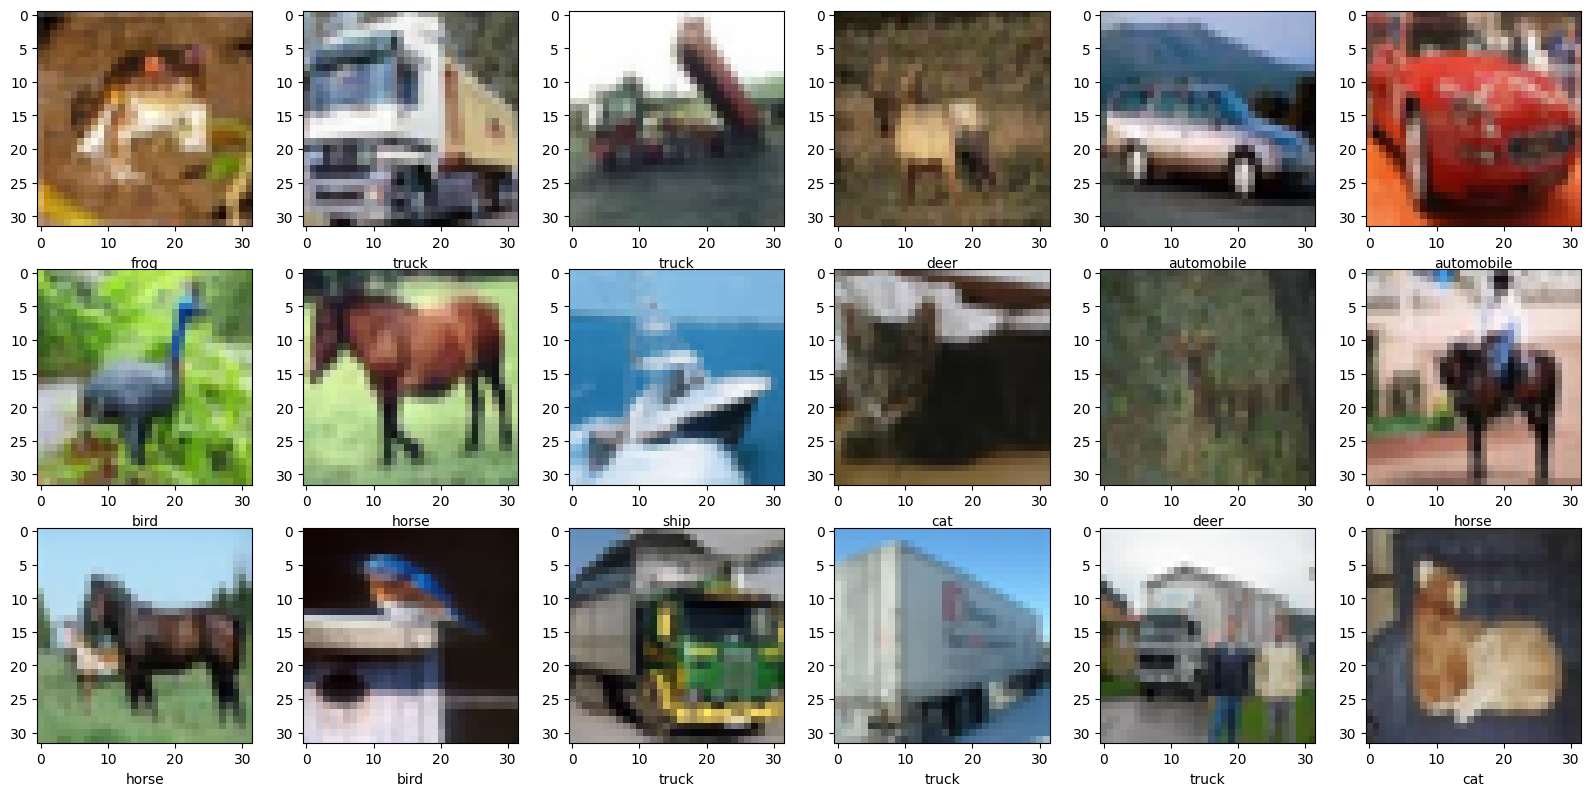

In [165]:
# Function to plot sample images
plt.figure(figsize=(20,9.5))
def plot_sample(X, y, index):
    plt.subplot(3,6,i+1)
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

# Plot sample images from the training set
for i in range(18):
    plot_sample(X_train, y_train, i)

<h5 style="color: slateblue ">Building an ANN artificial neural network for learning purpose</h5>

In [93]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])
ann.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_ann = ann.fit(X_train, y_train, epochs=30)

Epoch 1/30
1563/1563 [==============================] - 117s 75ms/step - loss: 1.8118 - accuracy: 0.3518
Epoch 2/30
1563/1563 [==============================] - 102s 65ms/step - loss: 1.6249 - accuracy: 0.4253
Epoch 3/30
1563/1563 [==============================] - 101s 64ms/step - loss: 1.5417 - accuracy: 0.4562
Epoch 4/30
1563/1563 [==============================] - 102s 65ms/step - loss: 1.4811 - accuracy: 0.4785
Epoch 5/30
1563/1563 [==============================] - 101s 65ms/step - loss: 1.4338 - accuracy: 0.4938
Epoch 6/30
1563/1563 [==============================] - 100s 64ms/step - loss: 1.3935 - accuracy: 0.5081
Epoch 7/30
1563/1563 [==============================] - 100s 64ms/step - loss: 1.3524 - accuracy: 0.5236
Epoch 8/30
1563/1563 [==============================] - 112s 71ms/step - loss: 1.3175 - accuracy: 0.5369
Epoch 9/30
1563/1563 [==============================] - 112s 72ms/step - loss: 1.2851 - accuracy: 0.5481
Epoch 10/30
1563/1563 [==============================] 

In [103]:
(loss,accuracy) = ann.evaluate(X_test,y_test)
print("Validation Accuracy: {:.2f}%".format(accuracy * 100))

313/313 [==============================] - 3s 10ms/step - loss: 1.4400 - accuracy: 0.5284
Validation Accuracy: 52.84%


<h2 style="color: coral">CNN Model Architecture</h2>
This architecture is designed for image classification tasks that takes input images with a shape of 32x32 pixels and three color channels (RGB).It has two convolutional and max pooling layers to downsample the feature maps, followed by fully connected layers for classification.
Note, <i>The ReLU activation function introduces non-linearity, and the softmax activation function at the output layer provides class probabilities for multi-class classification.</i>

In [110]:
# Build a convolutional neural network to train the images
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

<h2 style="color: coral">Model Training & Optimization</h2>
Here,we are using different hyperparameters, 
such as learning rate, batch size, and optimizer, to achieve better performance.
<li><i>Learning Rates </i>It controls the step size during optimization.</li>
<li><i>Batch Size </i>It determines how many data points are used in each update step</li>
<li><i>Optimizers</i> e.g. Adam, SGD</li>

In [111]:
# Defining the learning rate and optimizer
optimizer = keras.optimizers.Adam(learning_rate=0.001)

# Compiling the model
cnn.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

<h4 style="color: green">Using Early Stopping for Optimization</h4>

It prevents the overfitting of the dataset and hepls in preserving the best weights that are suitable for our model

In [119]:
early_stopping = EarlyStopping(monitor='val_loss',patience=10,min_delta=0.0001,restore_best_weights=True)
history = cnn.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32,callbacks=[early_stopping])

Epoch 1/100
1563/1563 [==============================] - 36s 23ms/step - loss: 0.5534 - accuracy: 0.8072 - val_loss: 0.9527 - val_accuracy: 0.7016
Epoch 2/100
1563/1563 [==============================] - 36s 23ms/step - loss: 0.5243 - accuracy: 0.8169 - val_loss: 0.9912 - val_accuracy: 0.6964
Epoch 3/100
1563/1563 [==============================] - 37s 24ms/step - loss: 0.5092 - accuracy: 0.8218 - val_loss: 0.9898 - val_accuracy: 0.7026
Epoch 4/100
1563/1563 [==============================] - 40s 26ms/step - loss: 0.4898 - accuracy: 0.8285 - val_loss: 1.0106 - val_accuracy: 0.6992
Epoch 5/100
1563/1563 [==============================] - 37s 24ms/step - loss: 0.4702 - accuracy: 0.8345 - val_loss: 1.0441 - val_accuracy: 0.6955
Epoch 6/100
1563/1563 [==============================] - 38s 24ms/step - loss: 0.4523 - accuracy: 0.8402 - val_loss: 1.0689 - val_accuracy: 0.6917
Epoch 7/100
1563/1563 [==============================] - 44s 28ms/step - loss: 0.4337 - accuracy: 0.8454 - val_loss: 1

<h2 style="color: coral">Model Evaluation</h2> 
Calculating metrics such as accuracy,precision, recall, and F1-score to assess the model's performance.

In [155]:
# Evaluate the CNN model
(Loss,accuracy) = cnn.evaluate(X_test, y_test)
y_pred = cnn.predict(X_test)
y_classes = [np.argmax(element) for element in y_pred]
print("Loss : ",loss)
print("Accuracy : ",accuracy)

313/313 [==============================] - 2s 7ms/step
Loss :  1.4400453567504883
Accuracy :  0.7016000151634216


<h5 style="color: green">Confusion Matrix</h5>
is to assess the performance of a machine learning model.

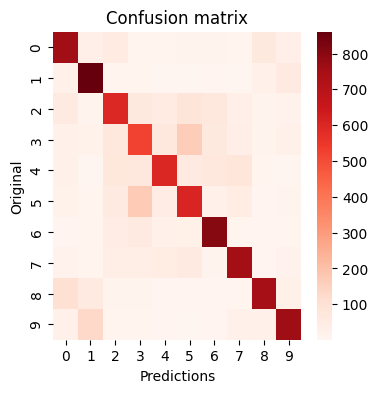

In [139]:
c_matrix = confusion_matrix(y_test,y_classes)
plt.figure(figsize=(4,4))
sns.heatmap(c_matrix,cmap='Reds')
plt.xlabel('Predictions')
plt.ylabel('Original')
plt.title('Confusion matrix')
plt.show()

In [126]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.76      0.73      1000
           1       0.75      0.86      0.80      1000
           2       0.62      0.60      0.61      1000
           3       0.54      0.52      0.53      1000
           4       0.70      0.60      0.64      1000
           5       0.59      0.61      0.60      1000
           6       0.75      0.81      0.78      1000
           7       0.75      0.75      0.75      1000
           8       0.82      0.75      0.78      1000
           9       0.79      0.76      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



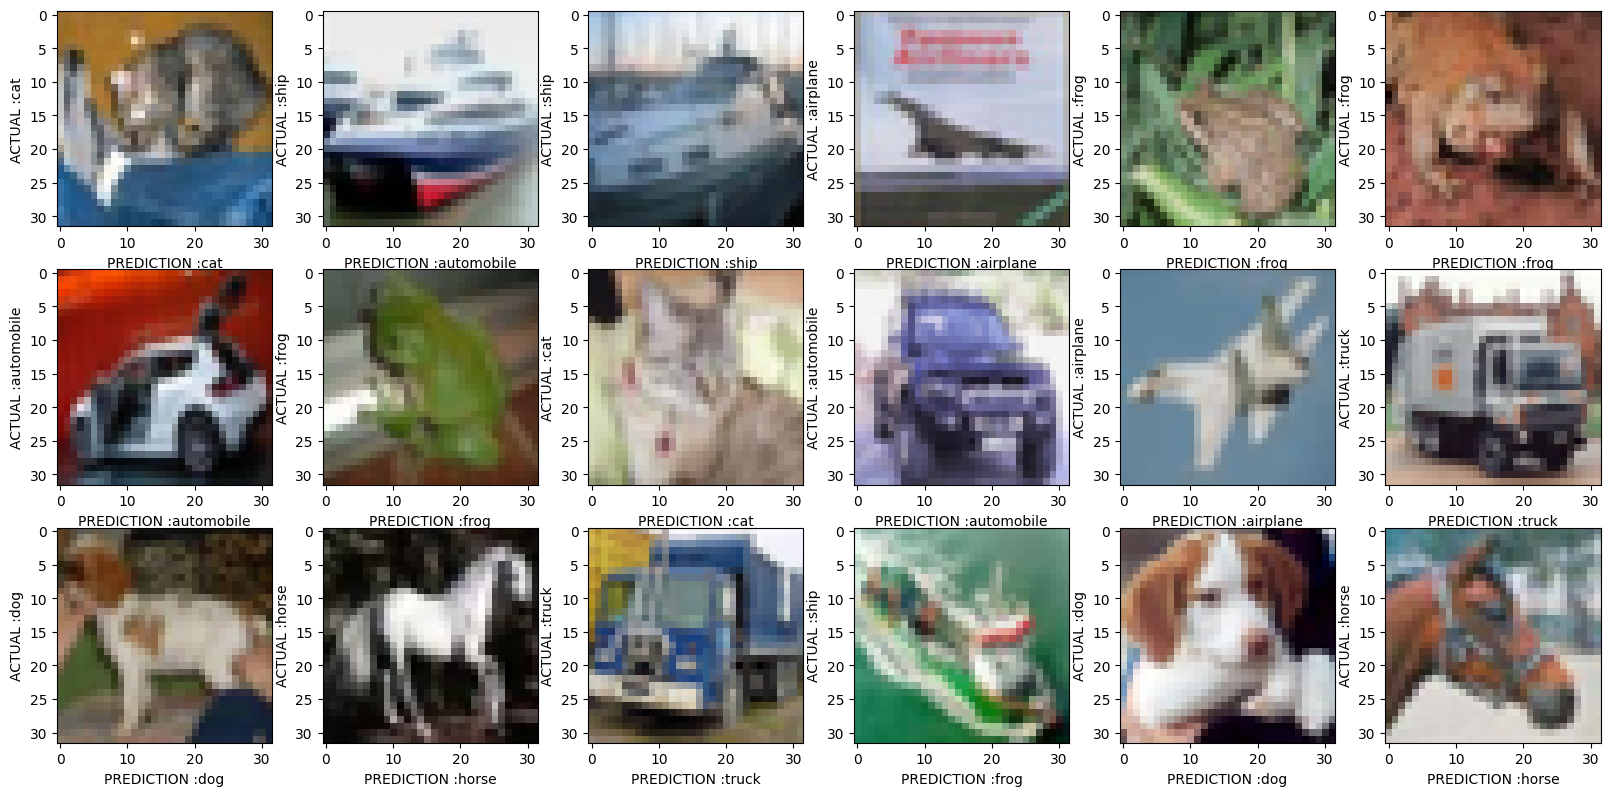

In [164]:
# Function to plot Predicted images
plt.figure(figsize=(20,9.5))
def plot_predictions(X, y, z,index):
    plt.subplot(3,6,i+1)
    plt.imshow(X[index])
    plt.xlabel("PREDICTION :" + classes[y[index]])
    plt.ylabel("ACTUAL :" + classes[z[index]])

# Plot sample images from the training set
for i in range(18):
    plot_predictions(X_test, y_classes,y_test,i)

<h2 style="color: coral">Dumping our model</h2> 
So, that it can be easily accesible by our flask aap

In [166]:
# We have exported our model
with open('cnn_model.pkl','wb') as files:
    pickle.dump(cnn,files)

<h2 style="color: darkred">Outcomes</h2> 

we have developed an flask application that has following features:
    <li>User friendly interface</li>
    <li>Responsive</li>
    <li>With moderate accuracy</li>
    <li>Uses the CNN model for classification</li>

Here's the git-hub link for the complete project
<a href = "https://github.com/Kanishka-Ahuja/cnn_img_classfication">Open Github</a>

To view the video representation of how the user interacts with our flask app follow the given link
<a href = "https://drive.google.com/file/d/1XWf0L6U07E-sx5B__kj2UB_nyDjAtINN/view?usp=drive_link"> Working Project Video</a>